In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
df = pd.read_csv("NAS.csv")                         #Read the csv

In [3]:
df.iloc[:, 0]= pd.to_datetime(df.iloc[:, 0])        #Convert date to datetime  
df.set_index('Date',inplace=True)                   #Setting date as index

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4253 entries, 2003-12-18 to 2020-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4218 non-null   float64
 1   High       4218 non-null   float64
 2   Low        4218 non-null   float64
 3   Close      4218 non-null   float64
 4   Adj Close  4218 non-null   float64
 5   Volume     4218 non-null   float64
dtypes: float64(6)
memory usage: 232.6 KB


In [5]:
df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4253 entries, 2003-12-18 to 2020-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4218 non-null   float64
 1   High       4218 non-null   float64
 2   Low        4218 non-null   float64
 3   Close      4218 non-null   float64
 4   Adj Close  4218 non-null   float64
 5   Volume     4204 non-null   float64
dtypes: float64(6)
memory usage: 232.6 KB


In [8]:
df.isnull().sum()/len(df)*100  #Checking % of data that's 0

Open         0.822949
High         0.822949
Low          0.822949
Close        0.822949
Adj Close    0.822949
Volume       1.152128
dtype: float64

In [9]:
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4.204000e+03
mean,79.895867,81.192986,78.314685,79.729549,79.729549,1.734079e+06
std,55.190463,55.964363,54.334272,55.112770,55.112770,1.031195e+07
min,0.601000,0.620000,0.585000,0.600600,0.600600,3.500000e+02
25%,37.693650,38.377500,36.565601,37.419450,37.419450,1.038025e+05
50%,63.989799,64.846802,62.561401,63.989799,63.989799,3.328355e+05
75%,128.550995,130.779007,126.265999,128.550995,128.550995,7.037935e+05
max,219.335999,220.535995,213.509003,216.822006,216.822006,4.075113e+08


In [11]:
X = df[['Close']]
y= (df['Close'].shift(-1))

In [12]:
print(X)

                Close
Date                 
2003-12-18  19.139799
2003-12-19  18.454201
2003-12-22  18.054300
2003-12-23  17.425800
2003-12-29  17.254400
...               ...
2020-10-12   0.676800
2020-10-13   0.600600
2020-10-14   0.626000
2020-10-15   0.605000
2020-10-16   0.610600

[4204 rows x 1 columns]


In [13]:
print(y)

Date
2003-12-18    18.454201
2003-12-19    18.054300
2003-12-22    17.425800
2003-12-23    17.254400
2003-12-29    17.711500
                ...    
2020-10-12     0.600600
2020-10-13     0.626000
2020-10-14     0.605000
2020-10-15     0.610600
2020-10-16          NaN
Name: Close, Length: 4204, dtype: float64


# COPYPASTA FROM:
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

LINEAR REGRESSION

-Something is wrong, guess some shift in dates

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
print(regressor.intercept_)

0.07691148104777312


In [17]:
print(regressor.coef_)

[0.99869316]


In [18]:
y_pred = regressor.predict(X_train)

In [20]:
df2 = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df2.sort_values(by='Date',inplace=True) 
df2

,Actual,Predicted
Date,,
2003-12-18,18.454201,19.191698
2003-12-23,17.254400,17.479939
2004-01-02,17.711500,17.822291
2004-01-05,17.597200,17.765265
2004-01-06,17.140100,17.651115
...,...,...
2020-10-02,0.989000,1.075605
2020-10-06,0.922600,1.065618
2020-10-13,0.626000,0.676727


<AxesSubplot:xlabel='Date'>

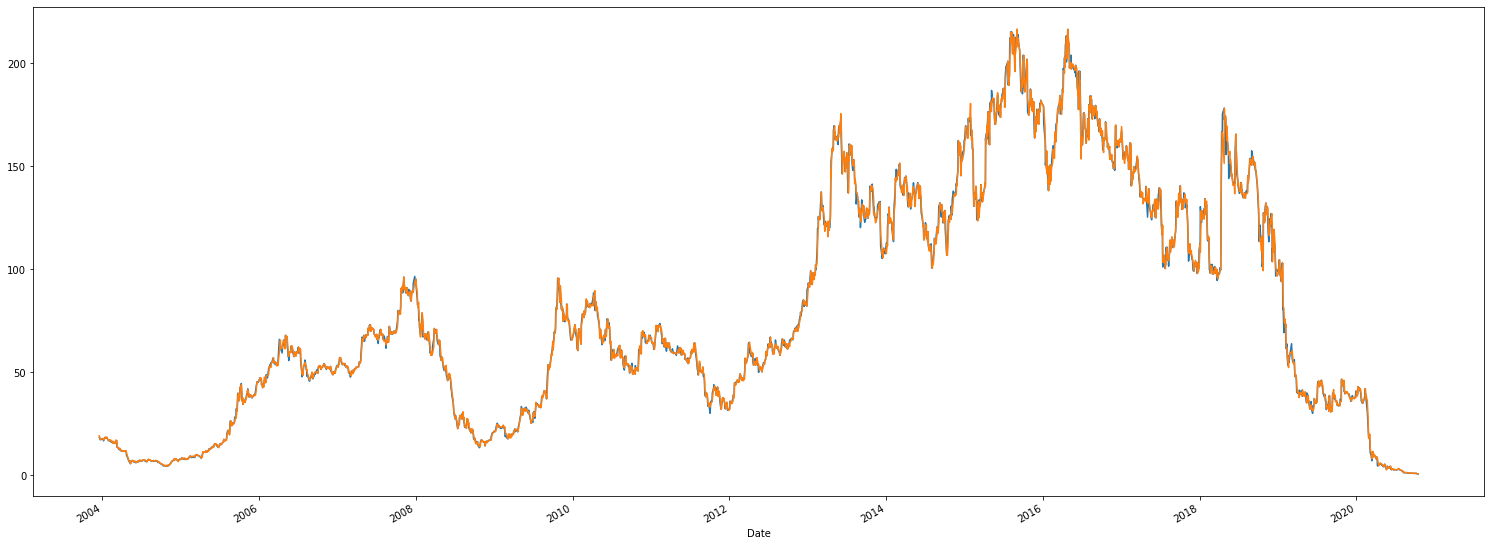

In [21]:
df2['Actual'].plot(figsize=(26,10))
df2['Predicted'].plot(figsize=(26,10))

In [22]:
#df2.isnull().sum()/len(df)*100  #Checking % of data that's 0
df2.dropna(inplace=True)

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df2['Actual'], df2['Predicted']))
print('Mean Squared Error:', metrics.mean_squared_error(df2['Actual'], df2['Predicted']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df2['Actual'], df2['Predicted'])))

Mean Absolute Error: 1.6845656788550467
Mean Squared Error: 7.740035568323791
Root Mean Squared Error: 2.782091941026355


In [24]:
r=(df2['Actual']/df2['Predicted'])



<AxesSubplot:xlabel='Date'>

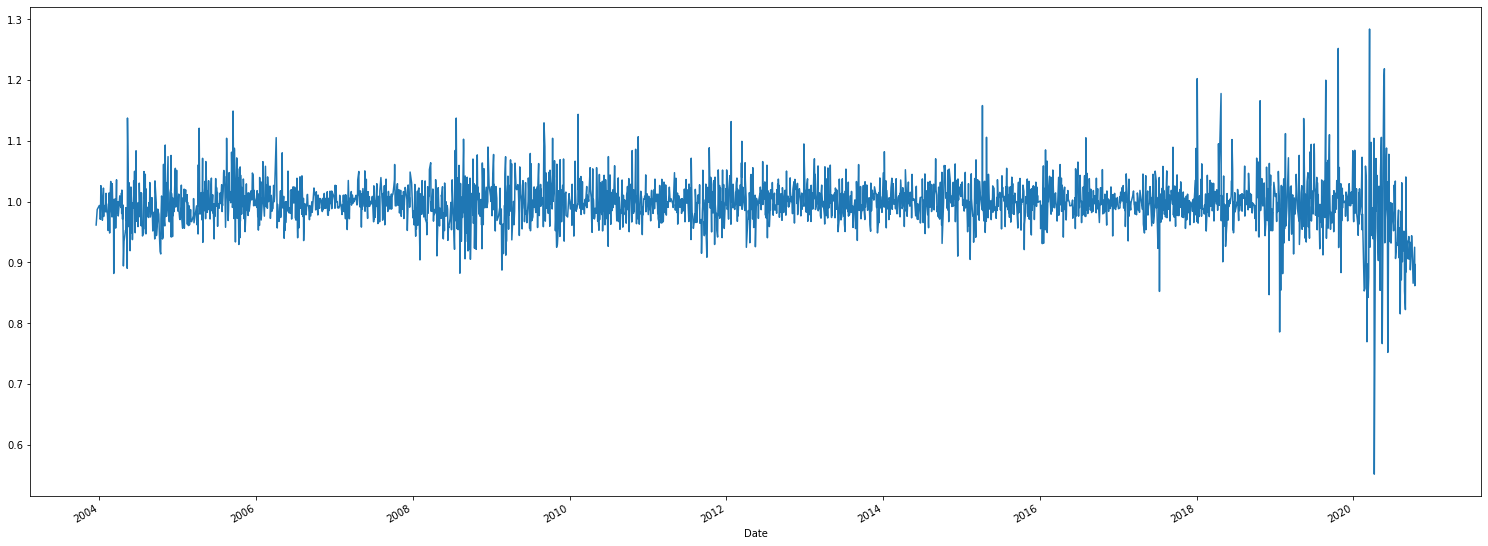

In [25]:
r.plot(figsize=(26,10))

In [48]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [78]:
X = df[['Close']]
y= (df['Close'].shift(-1))
y.dropna(inplace=True)
#X.dropna(inplace=True)
X.drop(X.tail(1).index,inplace=True) # drop last n rows

D:\Programering\Programmer\Anaconda\envs\dave3625\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
def rfr_model(X, y):# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,20),
            'n_estimators': (10, 50, 100, 1000, 2000, 4000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)# Perform K-Fold CV
    #scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')
    predictions = cross_val_predict(rfr, X, y, cv=10)
  
    return predictions

In [80]:
output = (rfr_model(X,y))

In [91]:
for val in output:
    print(val, end=" ")

19.41649555270947 19.509066798164014 18.099835490477396 17.475714744485334 17.208097337873944 17.475714744485334 17.475714744485334 17.475714744485334 17.475714744485334 17.208097337873944 16.594185616833194 17.475714744485334 17.475714744485334 18.099835490477396 19.16878024287301 19.41649555270947 19.509066798164014 17.475714744485334 18.099835490477396 18.099835490477396 19.509066798164014 18.099835490477396 18.099835490477396 18.099835490477396 17.35089160340425 17.208097337873944 16.958067876767053 16.70948978951838 16.958067876767053 16.70948978951838 16.70948978951838 16.70948978951838 17.208097337873944 16.70948978951838 16.420659229571292 16.594185616833194 16.233494424626237 16.233494424626237 16.420659229571292 16.420659229571292 16.420659229571292 15.396263826179899 15.396263826179899 15.672840254751327 16.233494424626237 16.233494424626237 16.233494424626237 15.567980554189727 15.672840254751327 16.233494424626237 16.420659229571292 16.958067876767053 16.70948978951838 16.

 147.49352644945827 147.49352644945827 170.63204536362932 169.85081960255494 154.20595559881667 161.11075030288362 164.31769804715879 163.45401323303014 157.18231196723104 157.18231196723104 172.88331894991342 161.75762065215898 172.88331894991342 161.11075030288362 156.56143043556435 156.19408549275605 163.99105298604766 161.11075030288362 161.11075030288362 164.31769804715879 163.68332713215156 169.85081960255494 166.23600292540112 169.85081960255494 163.68332713215156 154.20595559881667 155.37307773921276 153.7186048864068 153.20381022336335 153.7186048864068 157.18231196723104 156.3918299979879 153.7186048864068 153.7186048864068 157.18231196723104 157.18231196723104 155.37307773921276 157.58920858204584 154.20595559881667 156.56143043556435 157.18231196723104 153.20381022336335 153.7186048864068 155.37307773921276 153.7186048864068 153.56409519028642 147.49352644945827 147.49352644945827 157.58920858204584 157.18231196723104 161.36682187431217 161.11075030288362 161.36682187431217

In [81]:
df3=X

In [82]:
df3["Pred"]=output

<ipython-input-82-2c7a57dfa087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Pred"]=output


In [90]:
df3.tail(200)

,Close,Pred
Date,,
2019-12-27,37.820000,38.237601
2019-12-30,37.750000,38.237601
2020-01-02,40.939999,40.308914
2020-01-03,39.860001,39.341922
2020-01-06,38.570000,38.439073
...,...,...
2020-10-09,0.696400,4.709092
2020-10-12,0.676800,4.709092
2020-10-13,0.600600,4.709092


In [84]:
print(output)

[19.41649555 19.5090668  18.09983549 ...  4.70909215  4.70909215
  4.70909215]


<AxesSubplot:xlabel='Date'>

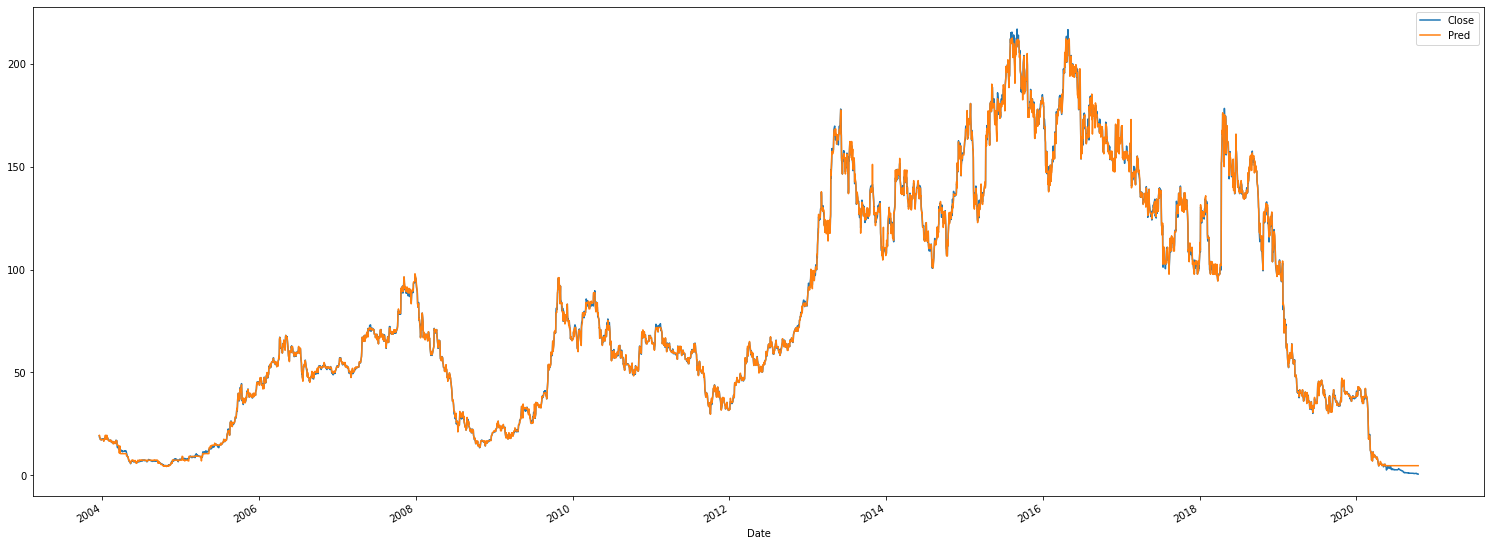

In [85]:
df3.plot(figsize=(26,10))

<AxesSubplot:xlabel='Date'>

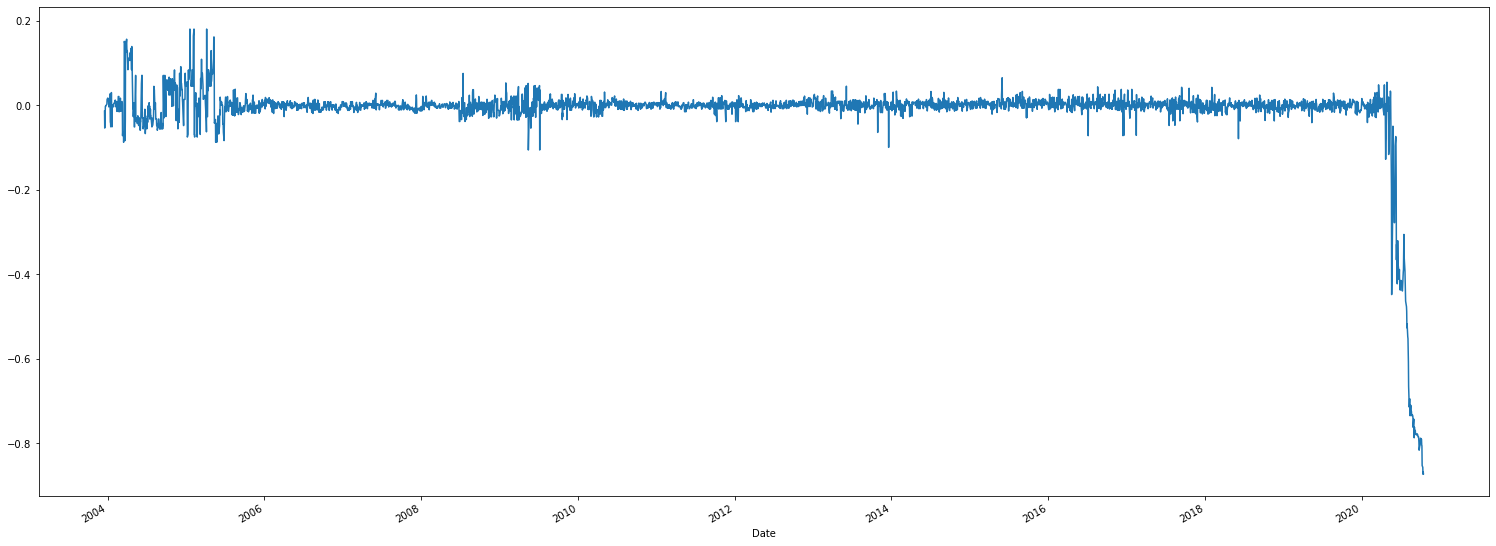

In [87]:
r=(df3['Close']/df3['Pred'])-1

r.plot(figsize=(26,10))